In [1]:
import numpy as np
import pandas as pd 

In [2]:
df = pd.read_csv('mental_health.csv')
df.head()
df_new=df.rename(columns={'text': 'tweet'})
df_new.head()
df_new = df_new.drop('label', axis=1) 
df_new.head()


,tweet
0,dear american teens question dutch person hear...
1,nothing look forward lifei dont many reasons k...
2,music recommendations im looking expand playli...
3,im done trying feel betterthe reason im still ...
4,worried year old girl subject domestic physic...


In [3]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27977 entries, 0 to 27976
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   27977 non-null  object
dtypes: object(1)
memory usage: 218.7+ KB


In [4]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
df_new['tweet'] = df_new['tweet'].apply(lambda x : ' '.join([t for t in x.split() if t not in stop_words]))
df_new.head()

,tweet
0,dear american teens question dutch person hear...
1,nothing look forward lifei dont many reasons k...
2,music recommendations im looking expand playli...
3,im done trying feel betterthe reason im still ...
4,worried year old girl subject domestic physica...


In [5]:
def remove(x):
    x = x.split()
    for i in range(len(x)):
       if(x[i].startswith('@')):
         x[i] = x[i].replace('@','')
       elif(x[i].startswith('#')):
         x[i].replace('#','')
    return ' '.join(x)

In [6]:
df_new['tweet'] = df_new['tweet'].apply(lambda x : remove(x))
df_new.head()

,tweet
0,dear american teens question dutch person hear...
1,nothing look forward lifei dont many reasons k...
2,music recommendations im looking expand playli...
3,im done trying feel betterthe reason im still ...
4,worried year old girl subject domestic physica...


In [9]:
df_new['numeric_counts'] = df_new['tweet'].apply(lambda x : len([t for t in x.split() if t.isdigit()]))
df_new[df_new['numeric_counts']==5]
df_new.head()

,tweet,numeric_counts
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,0
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,0
4,worried year old girl subject domestic physica...,0


In [10]:
df_new['tweet'] = df_new['tweet'].apply(lambda x : str(x).lower())
df_new.head()

,tweet,numeric_counts
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,0
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,0
4,worried year old girl subject domestic physica...,0


In [11]:
contractions = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and ",
"won't": "would not",
'dis': 'this',
'bak': 'back',
'brng': 'bring',
"won't":"would not",
'dis':'this',
"bak":"back",
"brng":'bring',
"i'v" : 'i have'
}

In [12]:
def expand(x):
    if type(x) is str:
      for key in contractions:
         value = contractions[key]
         x = x.replace(key,value)
      return x
    else:
      return x
df_new['tweet'] = df_new['tweet'].apply(lambda x : expand(x))
df_new.head()

,tweet,numeric_counts
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,0
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,0
4,worried year old girl subject domestic physica...,0


In [13]:
import re
# re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',x)

df_new['tweet'] = df_new['tweet'].apply(lambda x : re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)'," ",x))
df_new['tweet'] = df_new['tweet'].apply(lambda x : re.sub(r'[^\w]+'," ",x))

df_new['tweet'] = df_new['tweet'].apply(lambda x : re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?'," ",x))
df_new.head()

,tweet,numeric_counts
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,0
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,0
4,worried year old girl subject domestic physica...,0


In [15]:
import re

TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(tweet):
    return TAG_RE.sub('', tweet)
df_new.head()

,tweet,numeric_counts
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,0
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,0
4,worried year old girl subject domestic physica...,0


In [16]:
df_new.tail()

,tweet,numeric_counts
27972,posting everyday people stop caring religion m...,0
27973,okay definetly need hear guys opinion ive pret...,0
27974,cant get dog think ill kill myselfthe last thi...,0
27975,whats point princess bridei really think like ...,0
27976,got nudes person might might know snapchat ok ...,0


NameError: name 'sns' is not defined

In [18]:
text = ' '.join(df_new['tweet'])
len(text)

12595136

In [19]:
text = text.split()
freq_comm = pd.Series(text).value_counts()
fre = freq_comm[:20]
df_new['tweet'] = df_new['tweet'].apply(lambda x : ' '.join([w for w in x.split() if w not in fre]))
df_new.sample(5)

,tweet,numeric_counts
26887,found biggest pp among boys sure your supposed...,0
23290,venting lied toso listen guy friend tendencies...,0
5395,fucking troll made actually fucking cut selfit...,0
9153,years baby finnaly two years reddit first sub ...,0
18005,finally letting hair grow longer hair longer i...,0


In [20]:
import nltk
nltk.download('punkt')
!pip install textblob
from textblob import TextBlob
from nltk.tokenize import word_tokenize
df_new["tokens"] = df_new["tweet"].apply(lambda x: TextBlob(x).words)
df_new.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\com\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,tweet,numeric_counts,tokens
0,dear american teens question dutch person hear...,0,"[dear, american, teens, question, dutch, perso..."
1,nothing look forward lifei many reasons keep n...,0,"[nothing, look, forward, lifei, many, reasons,..."
2,music recommendations looking expand playlist ...,0,"[music, recommendations, looking, expand, play..."
3,done trying betterthe reason still alive mum d...,0,"[done, trying, betterthe, reason, still, alive..."
4,worried year old girl subject domestic physica...,0,"[worried, year, old, girl, subject, domestic, ..."


In [22]:
blob_emptyline2 = []
for i in df_new["tweet"]:


    blob = TextBlob(i).sentiment
    blob_emptyline2.append(blob)
df_blob2 = pd.DataFrame(blob_emptyline2)
df_blob3 = pd.concat([df_new.reset_index(drop=True), df_blob2], axis=1)
df_blob3.head()


,tweet,numeric_counts,tokens,polarity,subjectivity
0,dear american teens question dutch person hear...,0,"[dear, american, teens, question, dutch, perso...",0.142857,0.267857
1,nothing look forward lifei many reasons keep n...,0,"[nothing, look, forward, lifei, many, reasons,...",0.250000,0.250000
2,music recommendations looking expand playlist ...,0,"[music, recommendations, looking, expand, play...",0.195105,0.515734
3,done trying betterthe reason still alive mum d...,0,"[done, trying, betterthe, reason, still, alive...",-0.033516,0.460989
4,worried year old girl subject domestic physica...,0,"[worried, year, old, girl, subject, domestic, ...",-0.050715,0.425956


In [26]:
import numpy as np
df_blob3["sentiment"] =  np.where(df_blob3["polarity"] >= 0, "no_depression", "depression")
df_blob3.head(10)

,tweet,numeric_counts,tokens,polarity,subjectivity,sentiment
0,dear american teens question dutch person hear...,0,"[dear, american, teens, question, dutch, perso...",0.142857,0.267857,no_depression
1,nothing look forward lifei many reasons keep n...,0,"[nothing, look, forward, lifei, many, reasons,...",0.250000,0.250000,no_depression
2,music recommendations looking expand playlist ...,0,"[music, recommendations, looking, expand, play...",0.195105,0.515734,no_depression
3,done trying betterthe reason still alive mum d...,0,"[done, trying, betterthe, reason, still, alive...",-0.033516,0.460989,depression
4,worried year old girl subject domestic physica...,0,"[worried, year, old, girl, subject, domestic, ...",-0.050715,0.425956,depression
5,hey rredflag sure right place post goes curren...,0,"[hey, rredflag, sure, right, place, post, goes...",0.360714,0.521825,no_depression
6,someone needs hear tonight feeling right anyth...,0,"[someone, needs, hear, tonight, feeling, right...",0.103801,0.584673,no_depression
7,deserve liveif died right noone carei real fri...,0,"[deserve, liveif, died, right, noone, carei, r...",0.088645,0.516850,no_depression
8,feels good set dateim killing friday nice fina...,0,"[feels, good, set, dateim, killing, friday, ni...",0.433333,0.866667,no_depression
9,live guiltok made stupid random choice getting...,0,"[live, guiltok, made, stupid, random, choice, ...",-0.176152,0.588375,depression


In [27]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df_blob3['sentiment']= label_encoder.fit_transform(df_blob3['sentiment']) 
df_blob3['sentiment'].unique()

array([1, 0])

In [29]:
df_blob3.head()

,tweet,numeric_counts,tokens,polarity,subjectivity,sentiment
0,dear american teens question dutch person hear...,0,"[dear, american, teens, question, dutch, perso...",0.142857,0.267857,1
1,nothing look forward lifei many reasons keep n...,0,"[nothing, look, forward, lifei, many, reasons,...",0.250000,0.250000,1
2,music recommendations looking expand playlist ...,0,"[music, recommendations, looking, expand, play...",0.195105,0.515734,1
3,done trying betterthe reason still alive mum d...,0,"[done, trying, betterthe, reason, still, alive...",-0.033516,0.460989,0
4,worried year old girl subject domestic physica...,0,"[worried, year, old, girl, subject, domestic, ...",-0.050715,0.425956,0


<Axes: xlabel='sentiment'>

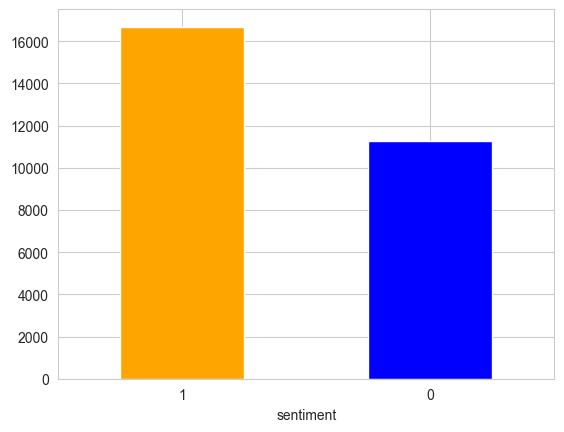

In [30]:
result = df_blob3["sentiment"].value_counts()
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
result.plot(kind="bar", rot=0, color=["orange","blue"])

In [31]:
df_blob3['sentiment'].value_counts()

sentiment
1    16687
0    11290
Name: count, dtype: int64

In [32]:
# class count
sentiment_count_0, sentiment_count_1 = df_blob3['sentiment'].value_counts()

# Separate class
sentiment_0 = df_blob3[df_blob3['sentiment'] == 0]
sentiment_1 = df_blob3[df_blob3['sentiment'] == 1]# print the shape of the class
print('class 0:', sentiment_0.shape)
print('class 1:', sentiment_1.shape)

class 0: (11290, 6)
class 1: (16687, 6)


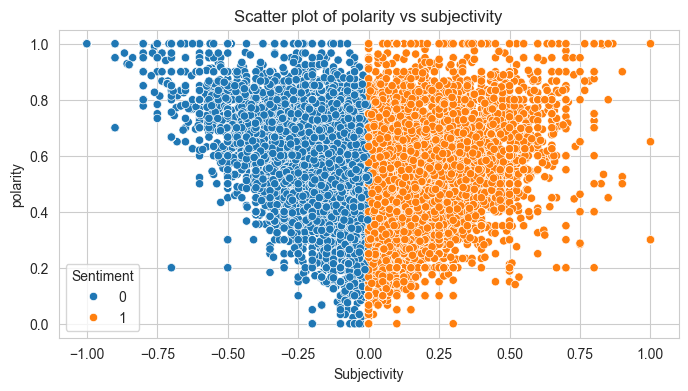

In [33]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df_blob3, x='polarity', y='subjectivity', hue='sentiment',)
plt.title('Scatter plot of polarity vs subjectivity')
plt.xlabel('Subjectivity')
plt.ylabel('polarity')
plt.legend(title='Sentiment')
plt.show()

Text(0.5, 1.0, 'not_depression_tweets')

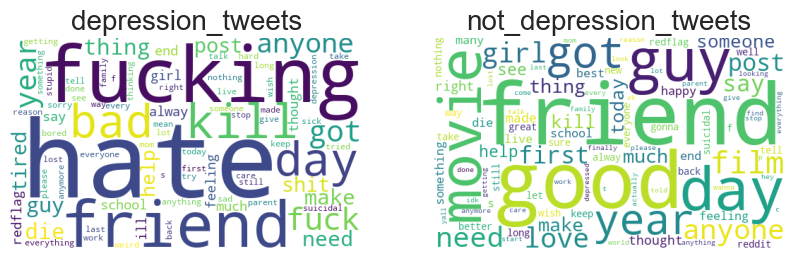

In [34]:
#plot
import matplotlib.pyplot as plt
# NLP
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from wordcloud import WordCloud, STOPWORDS
import re

# Warning
import warnings
warnings.filterwarnings('ignore')
# Plotting wordclouds for both negative and positive tweets
stopwords = set(STOPWORDS)

# Removing 'user' word 
stopwords.add('user')        

depression_tweets = df_new['tweet'][df_blob3['sentiment']==0].to_string()
wordcloud_depression = WordCloud(width = 500, height = 300, 
                               background_color ='white', stopwords = stopwords,
                               min_font_size = 10).generate(depression_tweets)

not_depression_tweets = df_new['tweet'][df_blob3['sentiment']==1].to_string()
wordcloud_not_depression = WordCloud(width = 500, height = 300, 
                               background_color ='white', stopwords = stopwords,
                               min_font_size = 10).generate(not_depression_tweets)
 #Plotting the WordCloud images                     
plt.figure(figsize=(10, 4), facecolor = None)

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_depression)
plt.axis("off")
plt.title('depression_tweets', fontdict={'fontsize': 20})

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_not_depression)
plt.axis("off")
plt.title('not_depression_tweets', fontdict={'fontsize': 20})

In [37]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X = df_blob3['tweet']
y = df_blob3['sentiment']
tfidf = TfidfVectorizer(norm = 'l1')
X = tfidf.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=2)
X_train

model_svm = LinearSVC()
model_svm.fit(X_train,y_train)

y_pred = model_svm.predict(X_test)
acc_score = accuracy_score(y_test,y_pred)
print(acc_score)

0.8361925184655706


In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.65      0.76      3437
           1       0.80      0.96      0.87      4957

    accuracy                           0.84      8394
   macro avg       0.86      0.81      0.82      8394
weighted avg       0.85      0.84      0.83      8394



In [39]:
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay,classification_report
cm = confusion_matrix(y_pred,y_test)
cm

array([[2237,  175],
       [1200, 4782]], dtype=int64)

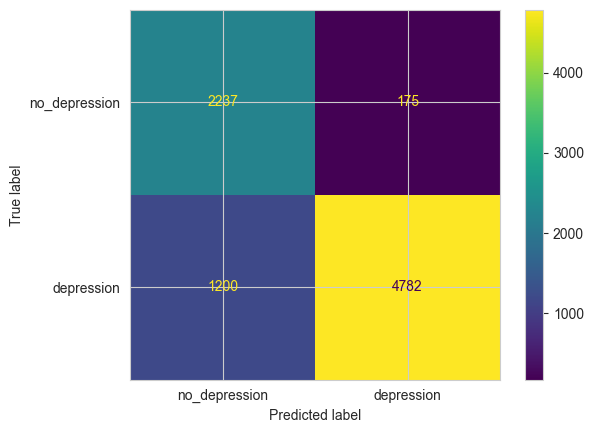

In [40]:
label=['no_depression', 'depression']
cmd = ConfusionMatrixDisplay(cm,display_labels=label)
cmd.plot()

In [46]:
from sklearn import linear_model
logr = linear_model.LogisticRegression()
logr.fit(X_train, y_train)
y_pred = logr.predict(X_test)
print(y_pred)
print(accuracy_score(y_test, y_pred))

[1 1 1 ... 1 1 1]
0.6957350488444127


In [43]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred= dt.predict(X_test)
print(y_pred)
print(accuracy_score(y_test, y_pred))

[0 1 1 ... 0 1 0]
0.7709077912794854


In [47]:
x = ['i am really sad. that you came with me']

In [49]:
logr.predict(tfidf.transform(x))[0]

0

SyntaxError: unterminated string literal (detected at line 1) (2216784503.py, line 1)

In [88]:
model_svm.predict(tfidf.transform(x))[0]

1

In [50]:
x=['Don’t ever be ashamed of loving the strange things that make your weird little heart happy.']

In [51]:
model_svm.predict(tfidf.transform(x))[0]

1

In [52]:
import pickle
#Saving the Count Vectorizer
pickle.dump(tfidf, open("tfidf.pkl", 'wb'))


In [58]:
import pickle 
pickle.dump(model_svm,open("analyzer.pkl",'wb'))